# Imports

In [33]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.model_selection import train_test_split
import torch as th
from torch import nn
import torchmetrics
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from torchviz import make_dot

In [34]:
df=pd.read_csv('./data/data.csv')

# EDA

In [35]:
df.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
0,64.0,0,155.0,60.0,12.73,106.59,0.91,135.0,4.1,83.0,7.75,22.8,24.8,1800.0,246.0,30.0,60.0,3.0,7.0
1,71.0,1,160.0,65.0,8.30,10.60,0.56,137.0,3.6,83.0,5.91,14.7,15.1,1600.0,220.0,26.6,52.0,2.8,6.0
2,23.0,0,165.0,74.0,10.60,14.40,0.75,136.0,4.2,83.0,5.80,14.3,13.5,2090.0,235.3,34.8,80.0,3.0,7.0
3,41.0,0,169.0,97.5,6.58,102.50,2.30,132.0,3.6,83.0,8.65,11.2,10.0,1770.0,243.0,29.5,66.3,3.3,5.0
4,54.0,0,158.0,75.0,12.76,107.17,0.97,135.0,4.1,83.0,5.14,22.8,24.8,1800.0,247.5,30.0,66.0,3.0,4.0


In [36]:
df.shape

(329, 19)

In [37]:
df.columns

Index(['patient_age', 'patient_gender', 'Ht', 'Wt', 'HB', 'UREA', 'CR', 'Na',
       'K', 'FBS', 'HBA1C', 'SGOT', 'SGPT', 'calories', 'cho', 'Fat', 'pro',
       'fluids', 'NA'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_age     329 non-null    float64
 1   patient_gender  329 non-null    int64  
 2   Ht              329 non-null    float64
 3   Wt              329 non-null    float64
 4   HB              329 non-null    float64
 5   UREA            329 non-null    float64
 6   CR              329 non-null    float64
 7   Na              329 non-null    float64
 8   K               329 non-null    float64
 9   FBS             329 non-null    float64
 10  HBA1C           329 non-null    float64
 11  SGOT            329 non-null    float64
 12  SGPT            329 non-null    float64
 13  calories        329 non-null    float64
 14  cho             329 non-null    float64
 15  Fat             329 non-null    float64
 16  pro             329 non-null    float64
 17  fluids          329 non-null    flo

In [39]:
df.describe()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,55.428571,0.604863,159.799088,66.775015,13.308328,84.366748,1.037356,134.978723,4.088997,83.835866,6.498419,24.169301,26.142432,1666.217021,228.210534,27.164855,66.241033,2.793617,5.688073
std,18.665588,0.489625,6.554106,9.359885,2.169859,36.848712,0.790122,2.737973,0.348625,10.879767,1.930419,10.601355,12.546147,211.027498,28.428929,3.280000,7.349294,0.362733,1.826452
min,10.000000,0.000000,135.000000,25.900000,6.580000,10.000000,0.530000,124.000000,2.400000,83.000000,4.600000,7.500000,6.700000,1190.000000,164.000000,20.000000,43.000000,2.000000,0.000000
25%,42.000000,0.000000,156.000000,63.000000,12.300000,43.100000,0.860000,135.000000,4.100000,83.000000,5.280000,22.800000,24.800000,1520.000000,209.000000,25.000000,62.000000,2.600000,5.000000
50%,58.000000,1.000000,160.000000,68.000000,13.700000,106.050000,0.890000,135.000000,4.100000,83.000000,5.800000,22.800000,24.800000,1620.000000,221.000000,27.000000,67.000000,2.900000,6.000000
75%,70.000000,1.000000,163.500000,71.500000,14.810000,106.970000,0.960000,135.000000,4.100000,83.000000,6.970000,22.800000,24.800000,1800.000000,247.500000,30.000000,70.000000,3.000000,7.000000
max,94.000000,1.000000,180.000000,98.500000,17.300000,200.700000,9.780000,157.000000,6.700000,276.000000,14.600000,133.000000,170.000000,2400.000000,330.000000,36.000000,84.000000,3.500000,8.000000


array([[<AxesSubplot:title={'center':'patient_age'}>,
        <AxesSubplot:title={'center':'patient_gender'}>,
        <AxesSubplot:title={'center':'Ht'}>,
        <AxesSubplot:title={'center':'Wt'}>],
       [<AxesSubplot:title={'center':'HB'}>,
        <AxesSubplot:title={'center':'UREA'}>,
        <AxesSubplot:title={'center':'CR'}>,
        <AxesSubplot:title={'center':'Na'}>],
       [<AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'FBS'}>,
        <AxesSubplot:title={'center':'HBA1C'}>,
        <AxesSubplot:title={'center':'SGOT'}>],
       [<AxesSubplot:title={'center':'SGPT'}>,
        <AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'cho'}>,
        <AxesSubplot:title={'center':'Fat'}>],
       [<AxesSubplot:title={'center':'pro'}>,
        <AxesSubplot:title={'center':'fluids'}>,
        <AxesSubplot:title={'center':'NA'}>, <AxesSubplot:>]],
      dtype=object)

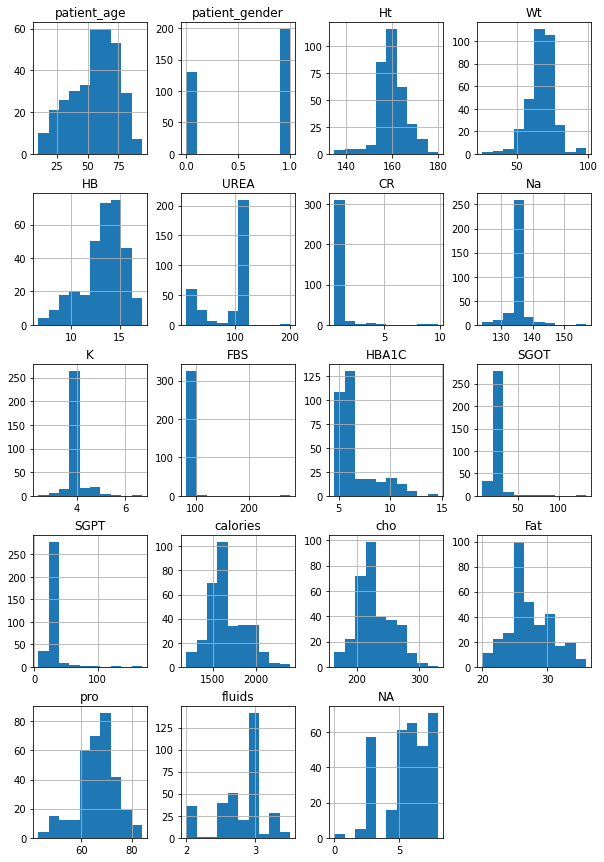

In [40]:
df.hist(figsize=(10,15))


<AxesSubplot:>

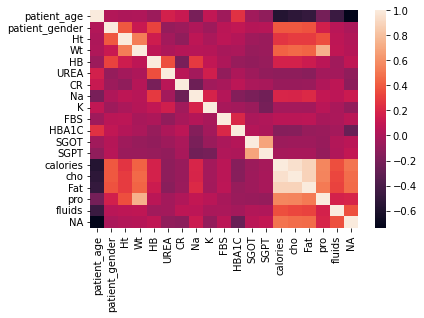

In [41]:
sns.heatmap(df.corr())

# Features, Targets

In [42]:
x=df.drop(['calories','cho','Fat','pro','fluids','NA'],axis=1)
y=df.iloc[:,13:]

In [43]:
x.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT
0,64.0,0,155.0,60.0,12.73,106.59,0.91,135.0,4.1,83.0,7.75,22.8,24.8
1,71.0,1,160.0,65.0,8.30,10.60,0.56,137.0,3.6,83.0,5.91,14.7,15.1
2,23.0,0,165.0,74.0,10.60,14.40,0.75,136.0,4.2,83.0,5.80,14.3,13.5
3,41.0,0,169.0,97.5,6.58,102.50,2.30,132.0,3.6,83.0,8.65,11.2,10.0
4,54.0,0,158.0,75.0,12.76,107.17,0.97,135.0,4.1,83.0,5.14,22.8,24.8


In [44]:
y.head()

,calories,cho,Fat,pro,fluids,NA
0,1800.0,246.0,30.0,60.0,3.0,7.0
1,1600.0,220.0,26.6,52.0,2.8,6.0
2,2090.0,235.3,34.8,80.0,3.0,7.0
3,1770.0,243.0,29.5,66.3,3.3,5.0
4,1800.0,247.5,30.0,66.0,3.0,4.0


# Data Split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=th.tensor(x_train.values,dtype=th.float32)
y_train=th.tensor(y_train.values,dtype=th.float32)
x_test=th.tensor(x_test.values,dtype=th.float32)
y_test=th.tensor(y_test.values,dtype=th.float32)

# to Torch Dataset

In [46]:
train_data=TensorDataset(x_train,y_train,)
test_data=TensorDataset(x_test,y_test)
train_data=DataLoader(train_data,batch_size=12,drop_last=True)
test_data=DataLoader(test_data,batch_size=1,drop_last=True)

# Model

In [47]:
class NutriNet(nn.Module):
    def __init__(self, input_features,output_features):
        super().__init__()
        self.block1=nn.Sequential(
            nn.Linear(input_features,512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.Dropout(0.25)
        )
        self.block2=nn.Sequential(
            nn.Linear(512,256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256,256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256,256),
            nn.Dropout(0.25)
        )
        self.block3=nn.Sequential(
            nn.Linear(256,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.Dropout(0.25)
        )
        self.block4=nn.Sequential(
            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64,64),
            nn.Dropout(0.25)
        )
        self.block5=nn.Sequential(
            nn.Linear(64,32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32,32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32,6),
        )


    def forward(self,x):
        out=self.block1(x)
        out=self.block2(out)
        out=self.block3(out)
        out=self.block4(out)
        out=self.block5(out)
        return out

# Hyper-Params

In [48]:
LEARNING_RATE=0.001
EPOCHS=300


In [49]:
model= NutriNet(13,6)
loss_fn=nn.L1Loss()
optimizer=th.optim.Adam(model.parameters(),lr=LEARNING_RATE)
accuracy=torchmetrics.Accuracy()

# Training Loop

In [50]:
loss_graph=[]
for i in range(EPOCHS):
    model.train()
    total_loss=0
    total_acc=0
    for x,y in train_data:
        y_pred=model(x)
        #print(y_pred)
        loss=loss_fn(y_pred,y)
        total_loss+=loss
      
        #acc=accuracy(y_pred,y)
        #total_acc+=acc

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if i%100==0:
        print(f'loss:{total_loss}')
    loss_graph.append(total_loss.detach().numpy())

loss:6978.93505859375
loss:4847.1396484375
loss:2070.489990234375


In [51]:
it=iter(test_data)



# Testing Loop

In [87]:
model.eval()
with th.inference_mode():
    x,y=next(it)
    print('input:',x)
    print('True Output: ',y)
    y_pred=model(x)
    print('prediction:',y_pred)
    print('Calories',loss_fn(y_pred.squeeze()[0],y.squeeze()[0]))
    print('Cho',loss_fn(y_pred.squeeze()[1],y.squeeze()[1]))
    print('fat',loss_fn(y_pred.squeeze()[2],y.squeeze()[2]))
    print('proteins',loss_fn(y_pred.squeeze()[3],y.squeeze()[3]))
    print('fluids',loss_fn(y_pred.squeeze()[4],y.squeeze()[4]))
    print('sodium',loss_fn(y_pred.squeeze()[5],y.squeeze()[5]))

    print(f'{y_pred[0]},{y[0]}')
    print((torchmetrics.R2Score()(y_pred[0],y[0])))
    

input: tensor([[ 82.0000,   1.0000, 159.0000,  51.0000,  15.3800, 105.0100,   0.8500,
         135.0000,   4.1000,  83.0000,   4.6600,  22.8000,  24.8000]])
True Output:  tensor([[1330.0000,  182.0000,   22.0000,   51.0000,    3.3000,    4.0000]])
prediction: tensor([[1515.2721,  200.6338,   24.9478,   61.3697,    2.7157,    5.0232]])
Calories tensor(185.2721)
Cho tensor(18.6338)
fat tensor(2.9478)
proteins tensor(10.3697)
fluids tensor(0.5843)
sodium tensor(1.0232)
tensor([1515.2721,  200.6338,   24.9478,   61.3697,    2.7157,    5.0232]),tensor([1330.0000,  182.0000,   22.0000,   51.0000,    3.3000,    4.0000])
tensor(0.9748)


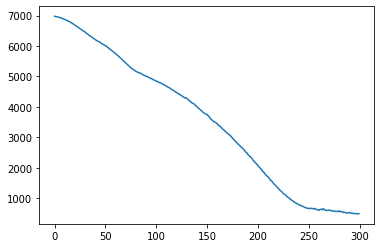

In [53]:
plt.plot(loss_graph)

In [54]:
th.save(model.state_dict(),'nutrinet_trained_1000.pth',_use_new_zipfile_serialization=False)

# Save Model

In [55]:
the_model = NutriNet(13,6)
the_model.load_state_dict(th.load('nutrinet_trained_1000.pth'))

<All keys matched successfully>

In [56]:
the_model.eval()
with th.inference_mode():
    x,y=next(it)
    print('input:',x)
    print('True Output: ',y)
    y_pred=the_model(x)
    print('prediction:',y_pred)
    print('Calories',loss_fn(y_pred.squeeze()[0],y.squeeze()[0]))
    print('Cho',loss_fn(y_pred.squeeze()[1],y.squeeze()[1]))
    print('fat',loss_fn(y_pred.squeeze()[2],y.squeeze()[2]))
    print('proteins',loss_fn(y_pred.squeeze()[3],y.squeeze()[3]))
    print('fluids',loss_fn(y_pred.squeeze()[4],y.squeeze()[4]))
    print('sodium',loss_fn(y_pred.squeeze()[5],y.squeeze()[5]))

    print(f'{y_pred[0]},{y[0]}')
    print((torchmetrics.R2Score()(y_pred[0],y[0])))

input: tensor([[ 45.0000,   1.0000, 170.0000,  72.0000,  14.7600, 106.0800,   0.8600,
         135.0000,   4.1000,  83.0000,   5.8000,  22.8000,  24.8000]])
True Output:  tensor([[1940.0000,  266.0000,   32.0000,   72.0000,    2.9000,    8.0000]])
prediction: tensor([[1701.6282,  239.9357,   28.3091,   68.8737,    2.8441,    6.3468]])
Calories tensor(238.3718)
Cho tensor(26.0643)
fat tensor(3.6909)
proteins tensor(3.1263)
fluids tensor(0.0559)
sodium tensor(1.6532)
tensor([1701.6282,  239.9357,   28.3091,   68.8737,    2.8441,    6.3468]),tensor([1940.0000,  266.0000,   32.0000,   72.0000,    2.9000,    8.0000])
tensor(0.9805)


In [57]:
g=th.Tensor([ 49.0000,   0.0000, 154.0000,  61.0000,  12.3000,  22.2000,   0.7100,
         136.0000,   4.7000,  83.0000,   4.9500,  16.8000,  15.7000])

In [58]:
outs=the_model(g.unsqueeze(0))

In [59]:
outs.detach().numpy().squeeze().tolist()

[1489.1318359375,
 209.4257049560547,
 24.809707641601562,
 61.58323287963867,
 2.4977970123291016,
 5.232020378112793]

# Make Viz

In [60]:

yt=the_model(g.unsqueeze(0))
make_dot(yt.mean(),params=dict(list(model.named_parameters()))).render('nutrinet',format='png')

'nutrinet.png'

# Model Summary

In [61]:
print(the_model)

NutriNet(
  (block1): Sequential(
    (0): Linear(in_features=13, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): Dropout(p=0.25, inplace=False)
  )
  (block2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Dropout(p=0.25, inplace=False)
  )
  (block3): Sequential(
    (0): Linear(in_features=256, ou

# Test API End-Point

In [88]:
#[ 49.0000,   0.0000, 154.0000,  61.0000,  12.3000,  22.2000,   0.7100, 136.0000,   4.7000,  83.0000,   4.9500,  16.8000,  15.7000]
import requests
send={
    "patient_age":'49',
    'patient_gender':'Female',
    'height':'154',
    'weight':'61',
    'hb':'12.3',
    'urea':'22.2',
    'cr':'0.71',
    'na':'136',
    'potassium':'4.7',
    'fbs':'83',
    'hba1c':'4.95',
    'sgot':'16.8',
    'sgpt':'15.7'
}

In [89]:
r=requests.post('https://us-central1-global-snow-372118.cloudfunctions.net/nutrinet',json=send)


In [90]:
r.status_code

200

In [91]:
'''[1600.58740234375,
 219.7861785888672,
 26.41321563720703,
 66.65478515625,
 2.8155128955841064,
 5.745589256286621]
'''
r.json()

{'cal': 1622.23,
 'cho': 222.39,
 'fat': 26.79,
 'fluids': 2.79,
 'pro': 67.02,
 'sodium': 5.5}